# Descenso del gradiente y Gradiente Conjugado.

**Objetivo.**

Describir e implementar los métodos de descenso del gradiente y de gradiente conjugado.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

In [1]:
import numpy as np
import ipywidgets as widgets
import macti.visual as mvis
import macti.matem as mmat
import macro
#from macti.evaluation import FileAnswer, Quizz
#quizz = Quizz('3', 'intro_MeIA_2023', '03_Ejercicios')

In [2]:
def grafica(x, y1, y2, sol = [], xs = [], ys = [], vA = [], xg = [], yg = [], z = []):
    """
    Esta función grafica las líneas rectas, la solución, los pasos y los eigenvectores.
    """
    v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
    v.set_coordsys(1)
    
    # Graficamos las líneas rectas
    v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
    v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2

    if len(sol):
        # Graficamos la solución
        v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, alpha=0.75, zorder=5, label='Solución final         .') # Solución

    if len(xs) and len(ys):
        # Graficamos los pasos
        v.scatter(1, xs[0], ys[0], fc='yellow', ec='k', s = 75, alpha=0.75, zorder=8, label='Solución inicial')
        v.scatter(1, xs[1:], ys[1:], c='navy', s = 10, alpha=0.5, zorder=8)
        v.plot(1, xs, ys, c='grey', ls = '--', lw=1.0, zorder=8, label='Pasos del método')

    if len(vA):
        # Graficamos los eigenvectores
        v.quiver(1, [sol[0], sol[0]], [sol[1], sol[1]], vA[0], vA[1], scale=10, zorder=9)

    if len(xg) and len(yg) and len(z):
        v.contour(1, xg, yg, z, levels = 25, cmap='twilight', linewidths=1.0, zorder=1)        
        
    v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.90, 1.02))
    v.grid()
    v.show()

# Ejemplo de un sistema lineal.

Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x + 2y & = &2 \\
2x + 6y & = &-8
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir como:

$$
\begin{array}{ccc}
\dfrac{3}{2}x + y & = & 1 \\
\dfrac{2}{6}x + y & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y = m_1 x + b_1 \\
y = m_2 x + b_2
\end{array} \text{ donde }
\begin{array}{ccc}
m_1 = -\dfrac{3}{2} & b_1 = 1 \\
m_2 = -\dfrac{2}{6} & b_2 = -\dfrac{8}{6}
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir en forma de un sistema lineal:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular el cruce de las rectas resolviendo el sistema lineal:

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [[ 2 -8]]
Solución del sistema:  [ 2. -2.]


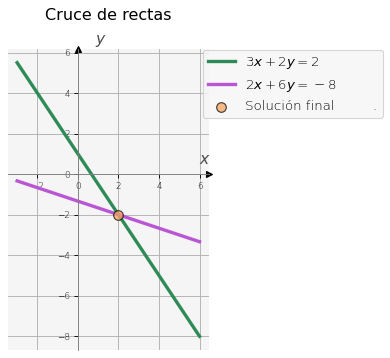

In [3]:
# Dominio
x = np.linspace(-3,6,10)

# Línea recta 1
m1 = -3/2
b1 = 1
y1 = m1 * x + b1

# Línea recta 2
m2 = -2/6
b2 = -8/6
y2 = m2 * x + b2 

# Definimos el sistema de ecuaciones lineales
A = np.array([[3, 2],[2,6]] )
b = np.array([[2,-8]])
print("Matriz A : \n",A)
print("Vector b : \n", b)

# Resolvemos el sistema
sol = np.linalg.solve(A,b[0])
print("Solución del sistema: ", sol)

# Usamos la función grafica() para mostrar las rectas y la solución
grafica(x, y1, y2, sol)

En general, un sistema de ecuaciones de $n \times n$ se escribe como sigue:

$$
\begin{array}{ccccccc}
a_{11}x_1 & + & a_{12}x_2 & +  \dots  + & a_{1n}x_n & = & b_1 \\
a_{21}x_1 & + & a_{22}x_2 & +  \dots + & a_{2n}x_n & = & b_2 \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{i1}x_1 & + & a_{i2}x_2 & +  \dots + & a_{in}x_n & = & b_i \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{n1}x_1 & + & a_{n2}x_2 & + \dots + & a_{nn}x_n & = & b_n
\end{array}
$$

Es posible usar métodos más eficientes que el de Jacobi, Gauss-Seidel y SOR para encontrar resolver este tipo de sistemas. 
A continuación veremos los métodos del descenso del gradiente y método de gradiente conjugado.

# Métodos del subespacio de Krylov
Una excelente referencia para comenzar con estos métodos es la siguiente:

Shewchuk, J. R. (1994). [An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf). Carnegie-Mellon University. Department of Computer Science.

## Cálculo de eigenvectores

In [4]:
# Usando la función np.linalg.eig()
np.linalg.eig(A)  # w: eigenvalues, v: eigenvectors

(array([2., 7.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [5]:
# Usando la función eigen_land() de macti
wA, vA = mmat.eigen_land(A)

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


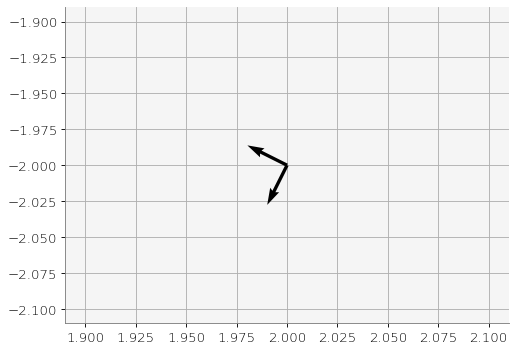

In [6]:
# Graficamos los eigenvectores
xv = np.array([[sol[0], sol[0]],
               [sol[1], sol[1]]])

v = mvis.Plotter() 
v.quiver(1, xv[0], xv[1], vA[0], vA[1], scale=10, zorder=6)
v.grid()
v.show()

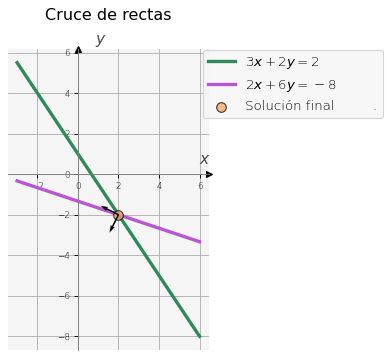

In [7]:
# Usamos la función grafica() para ver los eigenvectores
grafica(x,y1,y2,sol,vA=vA)

## Forma cuadrática

$$ f(\mathbf{x}) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + \mathbf{c} $$

$$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
\mathbf{x} =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
\mathbf{b} =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
\mathbf{c} =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$$

$$ f^\prime(\mathbf{x}) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $$

- Cuando $A$ es simétrica: $ f^\prime(\mathbf{x}) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(\mathbf{x})$ se obtiene cuando $ f^\prime(\mathbf{x}) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$

Calculemos la forma cuadrática para nuestro ejemplo:

In [8]:
# Función cuadrática
f = lambda A,b,c,x: 0.5 * x @ A @ x.T - x @ b.T + c

# Tamaño de la malla para graficar
size_grid = 30
xg, yg = np.meshgrid(np.linspace(-3,6,size_grid),
                     np.linspace(-8,6,size_grid))

# Arreglo para almacenar los valores de la función cuadrática
z = np.zeros((size_grid, size_grid))

# Cálculo
for i in range(size_grid):
    for j in range(size_grid):
        xc = np.array([[xg[i,j], yg[i,j]]])
        z[i,j] = f(A,b,0,xc)

Graficamos la forma cuadrática y la solución. Esta última debe estar en el mínimo de $f(\mathbf{x})$.

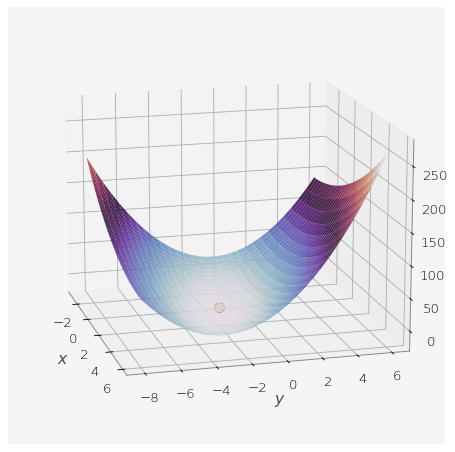

In [9]:
axis_par = [dict(projection='3d', aspect='auto', xlabel = '$x$', ylabel = '$y$', zlabel = '$f$')]
v = mvis.Plotter(1,1, axis_par, dict(figsize=(8,6)))
v.plot_surface(1, xg, yg, z, cmap='twilight', alpha=0.90) # f(x)
v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, zorder=5, label='Solución')
v.axes(1).view_init(elev = 15, azim = -15)

Esto es más claro si graficamos los contornos de $f(\mathbf{x})$:

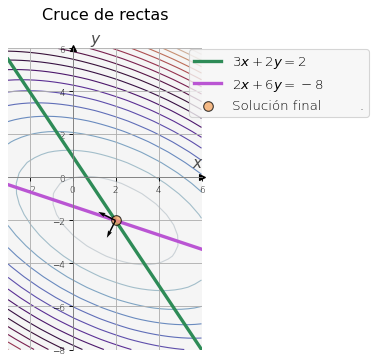

In [10]:
grafica(x, y1, y2, sol, vA = vA, xg = xg, yg = yg, z = z)

## Algoritmo de descenso por el gradiente.

$
\begin{array}{l}
\text{Input} : \mathbf{x}_0, tol \\
\mathbf{r}_0 = \mathbf{b}-A\mathbf{x}_0 \\
k = 0 \\
\text{WHILE}(\mathbf{r}_k > tol) \\
\qquad \mathbf{r}_k \leftarrow \mathbf{b}-A\mathbf{x}_k \\
\qquad \alpha_k \leftarrow \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{r}_k^T A \mathbf{r}_k} \\
\qquad \mathbf{x}_{k+1} \leftarrow \mathbf{x}_k + \alpha_k \mathbf{r}_k \\
\qquad k \leftarrow k + 1 \\
\text{ENDWHILE}
\end{array}
$

### Implementación 4.

In [11]:
def steepest(A,b,x,tol,kmax):
    xs, ys = [x[0,0]], [x[1,0]]
    xe = np.array([2, -2])
                  
    r = b.T - A @ x
    res = np.linalg.norm(r)
    res_list = []
    error = []
    
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T @ r / (r.T @ A @ r)
        x = x + r * alpha
        xs.append(x[0,0])
        ys.append(x[1,0])
        r = b.T - A @ x
        
        # Resido
        res = np.linalg.norm(r,1)
        res_list.append(res)
        
        # Error
        e = np.linalg.norm(np.array([x[0,0],x[1,0]])-xe,2)
        error.append(e)
        
        k += 1
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, x[0,0], x[1,0]))
    return x, np.array(xs), np.array(ys), error, res_list, k 

In [12]:
# Solución inicial (debe darse como un arreglo tipo columna)
# xini = ...

# Método Steepest descend
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2., 2.
xini = np.array([xi, yi]).reshape(-1,1) 
tol = 1e-5
kmax = 50

# Método Steepest descend
solGrad, xs, ys, errorGrad, resGrad, itGrad  = steepest(A, b, xini, tol, kmax)

#file_answer.write('5', solGrad, 'Revisa la llamada y ejecución de la función steepest()')
### END SOLUTION

 1 3.261835423 (-1.180722892, -1.277108434)
 2 1.717502736 (0.785542169, -0.785542169)
 3 0.990340394 (1.034286544, -1.780519669)
 4 0.521458662 (1.631273044, -1.631273044)
 5 0.300681662 (1.706795433, -1.933362598)
 6 0.158322389 (1.888049165, -1.888049165)
 7 0.091291300 (1.910978854, -1.979767921)
 8 0.048068966 (1.966010108, -1.966010108)
 9 0.027717358 (1.972971893, -1.993857248)
10 0.014594433 (1.989680177, -1.989680177)
11 0.008415391 (1.991793876, -1.998134972)
12 0.004431081 (1.996866753, -1.996866753)
13 0.002555034 (1.997508502, -1.999433750)
14 0.001345340 (1.999048701, -1.999048701)
15 0.000775745 (1.999243545, -1.999828078)
16 0.000408465 (1.999711172, -1.999711172)
17 0.000235528 (1.999770329, -1.999947802)
18 0.000124016 (1.999912308, -1.999912308)
19 0.000071510 (1.999930269, -1.999984152)
20 0.000037653 (1.999973375, -1.999973375)
21 0.000021711 (1.999978829, -1.999995188)
22 0.000011432 (1.999991916, -1.999991916)
23 0.000006592 (1.999993572, -1.999998539)
24 0.00000

In [ ]:
quizz.eval_numeric('5', solGrad)

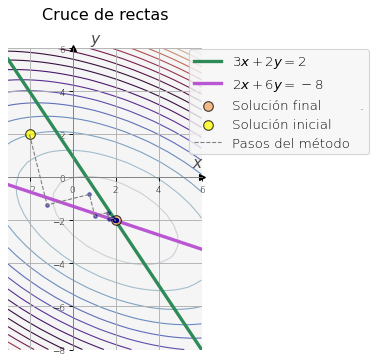

In [13]:
grafica(x, y1, y2, sol, xs, ys, xg = xg, yg = yg, z = z)

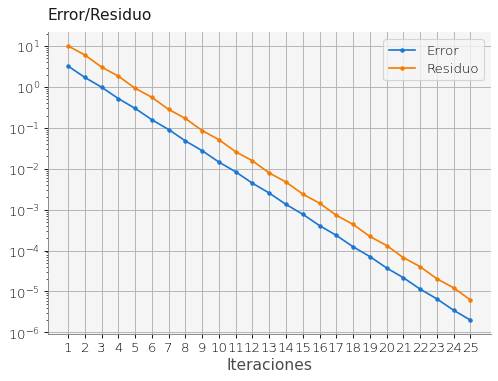

In [14]:
# Lista con el número de las iteraciones
l_itGrad = list(range(1,itGrad+1)) 

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error/Residuo', loc='left')
v.plot(1, l_itGrad, errorGrad, marker='.', label='Error')
v.plot(1, l_itGrad, resGrad, marker='.', label='Residuo')
v.legend()
v.grid()

## Algoritmo de Gradiente Conjugado

$
\begin{array}{l}
\text{Input} : A, \mathbf{b}, \mathbf{x}_0, k_{max}, tol \\
\mathbf{d_0} = \mathbf{r}_0 = \mathbf{b} - A \mathbf{x}_0 \\ 
k = 0 \\
\text{While} (||\mathbf{r}|| > tol \quad \text{AND} \quad k < k_{max} ) \\
\qquad \alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} \\
\qquad \mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{d}_{k} \\
\qquad \mathbf{r}_{k+1} = \mathbf{r}_{k} - \alpha_k A \mathbf{d}_{k} \\
\qquad \beta_{k+1} = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_{k}^T \mathbf{r}_{k}}  \\
\qquad \mathbf{d}_{k+1} = \mathbf{r}_{k+1} + \beta_{k+1} \mathbf{d}_{k} \\
\qquad k = k + 1  \\
\text{End While}
\end{array}
$

### Implementación 5.

In [15]:
def conjugateGradient(A,b,x,tol,kmax):
    xs, ys = [x[0,0]], [x[1,0]]
    xe = np.array([2, -2])

    r = b.T - A @ x
    d = r
    rk_norm = r.T @ r
    res = np.linalg.norm(rk_norm)
    res_list = []
    error = [] 

    k = 0
    while(res > tol and k < kmax):
        alpha = float(rk_norm) / float(d.T @ A @ d)
        x = x + alpha * d
        xs.append(x[0,0])
        ys.append(x[1,0])
        r = r - alpha * A @ d
        
        # Residuo
        res = np.linalg.norm(r)
        res_list.append(res)

        # Error
        e = np.linalg.norm(np.array([x[0,0],x[1,0]])-xe,2)
        error.append(e)
        
        rk_old = rk_norm
        rk_norm = r.T @ r
        beta = float(rk_norm) / float(rk_old)
        d = r + beta * d
        k += 1
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, x[0,0], x[1,0]))
    return x, np.array(xs), np.array(ys), error, res_list, k

In [16]:
# Solución inicial (debe darse como un arreglo tipo columna)
# xini = ...

# Método CGM
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2., 2.
xini = np.array([xi, yi]).reshape(-1,1) 
tol = 1e-5
kmax = 50

# Método CGM
solCGM, xs, ys, errorCGM, resCGM, itCGM = conjugateGradient(A, b, xini, tol, kmax)

#file_answer.write('6', solCGM, 'Revisa la llamada y ejecución de la función conjugateGradient()')
### END SOLUTION

 1 3.261835423 (-1.180722892, -1.277108434)
 2 0.000000000 (2.000000000, -2.000000000)


In [ ]:
quizz.eval_numeric('6',solCGM)

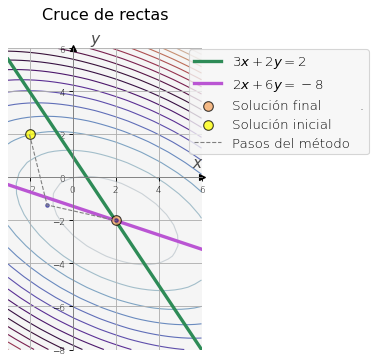

In [17]:
grafica(x, y1, y2, sol, xs, ys, xg = xg, yg = yg, z = z)

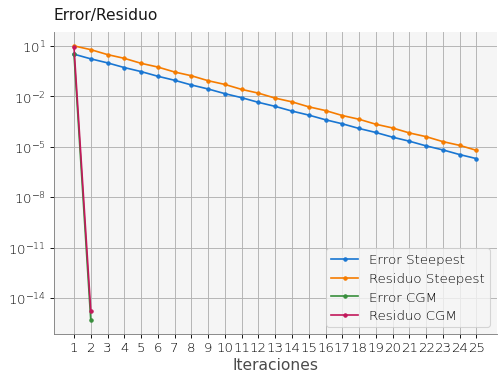

In [18]:
# Lista con el número de las iteraciones
l_itGrad = list(range(1,itGrad+1)) 
l_itCGM = list(range(1,itCGM+1))

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error/Residuo', loc='left')

v.plot(1, l_itGrad, errorGrad, marker='.', label='Error Steepest')
v.plot(1, l_itGrad, resGrad, marker='.', label='Residuo Steepest')
v.plot(1, l_itCGM, errorCGM, marker='.', label='Error CGM')
v.plot(1, l_itCGM, resCGM, marker='.', label='Residuo CGM')

v.legend()
v.grid()

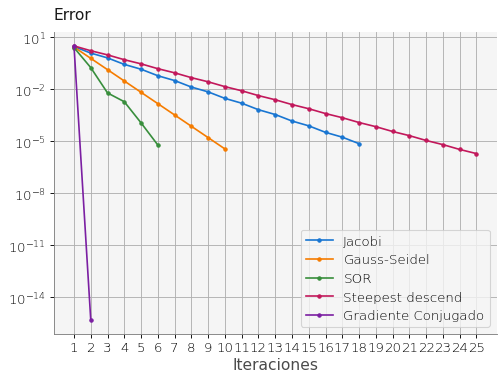

In [19]:
eJ = np.load('errorJacobi.npy')
eG = np.load('errorGaussSeidel.npy')
eSOR = np.load('errorSOR.npy')

# Lista con el número de las iteraciones
l_itJ = list(range(1,len(eJ)+1)) 
l_itG = list(range(1,len(eG)+1)) 
l_itSOR = list(range(1,len(eSOR)+1)) 
l_itGrad = list(range(1,itGrad+1)) 
l_itCGM = list(range(1,itCGM+1))

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itJ, eJ, marker='.', label='Jacobi')
v.plot(1, l_itG, eG, marker='.', label='Gauss-Seidel')
v.plot(1, l_itSOR, eSOR, marker='.', label='SOR')
v.plot(1, l_itGrad, errorGrad, marker='.', label='Steepest descend')
v.plot(1, l_itCGM, errorCGM, marker='.', label='Gradiente Conjugado')

v.legend()
v.grid()